<a href="https://colab.research.google.com/github/asrenninger/urbansim/blob/main/automl/bms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!git clone https://bitbucket.org/rguimera/machine-scientist bms

fatal: destination path 'bms' already exists and is not an empty directory.


In [14]:
import sys

# Add the root directory of the cloned repo to sys.path
sys.path.append('/content/bms')

# Add the Prior directory to sys.path
sys.path.append('/content/bms/Prior')

In [15]:
import sys
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from copy import deepcopy
from ipywidgets import IntProgress
from IPython.display import display

In [16]:
sys.path.append('./')
sys.path.append('./Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par

In [ ]:
# XLABS = [
#     'eff',
#     'D_max',
#     'D_apr',
#     'D_may',
#     'D_jun',
#     'ET_apr',
#     'ET_may',
#     'ET_jun',
#     'PT_apr',
#     'PT_may',
#     'PT_jun',
#     'PT_jul',
#     'PDO_win',
# ]
# raw_data = pd.read_csv('/content/bms/Validation/LogYe/data/seymour.csv')
# x, y = raw_data[XLABS], np.log(raw_data['rec'])
# x.head()

In [ ]:
# # Read the hyperparameters for the prior
# prior_par = read_prior_par('/content/bms/Prior/final_prior_param_sq.named_equations.nv13.np13.2016-09-01 17:05:57.196882.dat')

# # Set the temperatures for the parallel tempering
# Ts = [1] + [1.04**k for k in range(1, 20)]

# # Initialize the parallel machine scientist
# pms = Parallel(
#     Ts,
#     variables=XLABS,
#     parameters=['a%d' % i for i in range(13)],
#     x=x, y=y,
#     prior_par=prior_par,
# )

In [ ]:
# # Number of MCMC steps
# nstep = 100

# # Draw a progress bar to keep track of the MCMC progress
# f = IntProgress(min=0, max=nstep, description='Running:') # instantiate the bar
# display(f)

# # MCMC
# for i in range(nstep):
#     # MCMC update
#     pms.mcmc_step() # MCMC step within each T
#     pms.tree_swap() # Attempt to swap two randomly selected consecutive temps
#     # Update the progress bar
#     f.value += 1

In [ ]:
# # Number of MCMC steps
# nstep = 5000

# # Draw a progress bar to keep track of the MCMC progress
# f = IntProgress(min=0, max=nstep, description='Running:') # instantiate the bar
# display(f)

# # MCMC
# description_lengths, mdl, mdl_model = [], np.inf, None
# for i in range(nstep):
#     # MCMC update
#     pms.mcmc_step() # MCMC step within each T
#     pms.tree_swap() # Attempt to swap two randomly selected consecutive temps
#     # Add the description length to the trace
#     description_lengths.append(pms.t1.E)
#     # Check if this is the MDL expression so far
#     if pms.t1.E < mdl:
#         mdl, mdl_model = pms.t1.E, deepcopy(pms.t1)
#     # Update the progress bar
#     f.value += 1

In [ ]:
# print('Best model:       ', mdl_model)
# print('Parameter values: ', mdl_model.par_values['d0'])
# print('Desc. length:     ', mdl)

In [ ]:
# plt.figure(figsize=(15, 5))
# plt.plot(description_lengths)
# plt.xlabel('MCMC step', fontsize=14)
# plt.ylabel('Description length', fontsize=14)
# plt.title('MDL model: $%s$' % mdl_model.latex())
# plt.show()

In [17]:
df = pd.read_csv("https://github.com/asrenninger/urbansim/raw/main/automl/migration.csv.gz")
df.columns

Index(['code_i', 'code_j', 'F_ij', 'distance', 'name_i', 'name_j', 'density_i',
       'married_i', 'households_i', 'population_i', 'nonwhite_i',
       'unhealthy_i', 'employed_i', 'university_i', 'density_j', 'married_j',
       'households_j', 'population_j', 'nonwhite_j', 'unhealthy_j',
       'employed_j', 'university_j'],
      dtype='object')

In [18]:
ready = df.rename(columns={'distance': 'D_ij', 'population_i': 'P_i', 'population_j': 'P_j', 'employed_i': 'E_i', 'employed_j': 'E_j'})

In [19]:
XLABS = ['D_ij', 'P_i', 'P_j', 'E_i', 'E_j']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ready[XLABS], np.log(ready['F_ij']), test_size=0.5)
X_train.head()

,D_ij,P_i,P_j,E_i,E_j
35457,164.702951,218871,433213,0.432136,0.438791
5465,22.348905,115314,279773,0.484737,0.473984
3499,133.178702,379580,185543,0.441996,0.460767
32038,55.722709,267013,556523,0.441125,0.434859
18787,228.567351,123359,142295,0.427776,0.390569


In [21]:
# Read the hyperparameters for the prior
prior_par = read_prior_par('/content/bms/Prior/final_prior_param_sq.named_equations.nv5.np10.2016-07-11 17:12:38.129639.dat')

# Set the temperatures for the parallel tempering
Ts = [1] + [1.04**k for k in range(1, 20)]

# Initialize the parallel machine scientist
pms = Parallel(
    Ts,
    variables=XLABS,
    parameters=['a%d' % i for i in range(13)],
    x=X_train, y=y_train,
    prior_par=prior_par,
)

In [23]:
%%time
# Number of MCMC steps
nstep = 500

# Draw a progress bar to keep track of the MCMC progress
f = IntProgress(min=0, max=nstep, description='Running:') # instantiate the bar
display(f)

# MCMC
description_lengths, mdl, mdl_model = [], np.inf, None
for i in range(nstep):
    # MCMC update
    pms.mcmc_step() # MCMC step within each T
    pms.tree_swap() # Attempt to swap two randomly selected consecutive temps
    # Add the description length to the trace
    description_lengths.append(pms.t1.E)
    # Check if this is the MDL expression so far
    if pms.t1.E < mdl:
        mdl, mdl_model = pms.t1.E, deepcopy(pms.t1)
    # Update the progress bar
    f.value += 1

IntProgress(value=0, description='Running:', max=500)

CPU times: user 1h 24min 47s, sys: 4.08 s, total: 1h 24min 51s
Wall time: 1h 24min 32s


In [24]:
print('Best model:       ', mdl_model)
print('Parameter values: ', mdl_model.par_values['d0'])
print('Desc. length:     ', mdl)
# Best model:        (((((P_i / (_a2_ * (_a11_ ** D_ij))) ** _a4_) / (_a8_ + D_ij)) + ((P_i * P_j) * _a6_)) ** _a9_)
# Parameter values:  {'_a2_': 0.0001947999797728971, '_a4_': 0.2774135023354434, '_a6_': 5.73377029483823e-11, '_a8_': 6.8444741605833554, '_a9_': 0.5666529531113532, '_a11_': 1.0440441124002635, '_a0_': 1.0, '_a1_': 1.0, '_a3_': 1.0, '_a5_': 1.0, '_a7_': 1.0, '_a10_': 1.0, '_a12_': 1.0}
# Desc. length:      61796.0710779894

Best model:        ((((D_ij ** (_a0_ / (D_ij * _a1_))) * ((P_i ** (_a3_ * _a10_)) * (_a11_ + P_j))) * -(_a1_)) + _a12_)
Parameter values:  {'_a0_': 2.242005708242809e-06, '_a1_': -4.48319449516079e-06, '_a3_': -2.814138168833793e-06, '_a10_': 7234.068281686949, '_a11_': -11721471.625865605, '_a12_': 41.36824328103201, '_a2_': 1.0, '_a4_': 1.0, '_a5_': 1.0, '_a6_': 1.0, '_a7_': 1.0, '_a8_': 1.0, '_a9_': 1.0}
Desc. length:      62013.5143777350


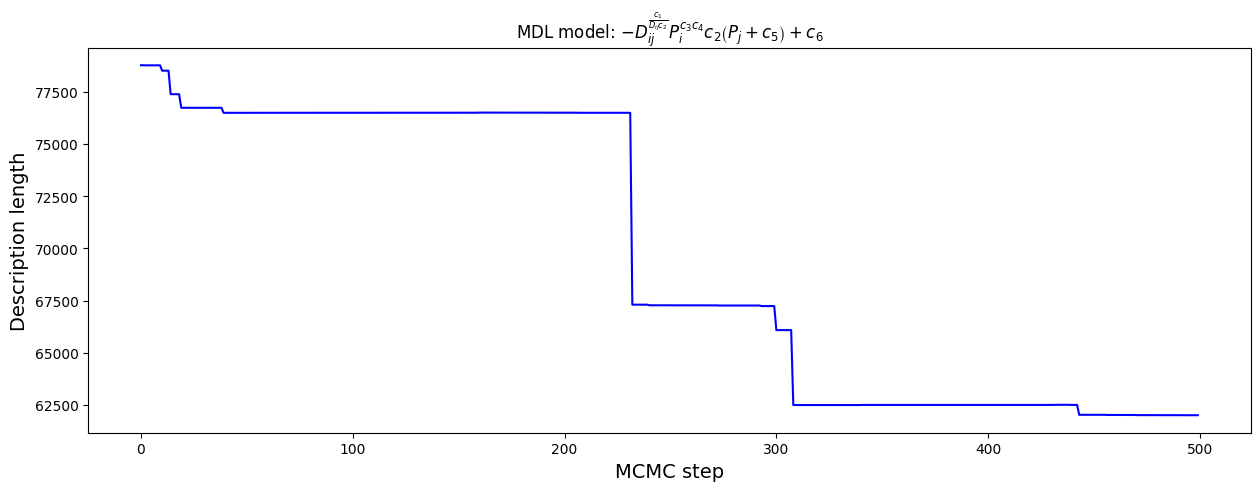

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(description_lengths, color='blue')
plt.xlabel('MCMC step', fontsize=14)
plt.ylabel('Description length', fontsize=14)
plt.title('MDL model: $%s$' % mdl_model.latex())
plt.show()

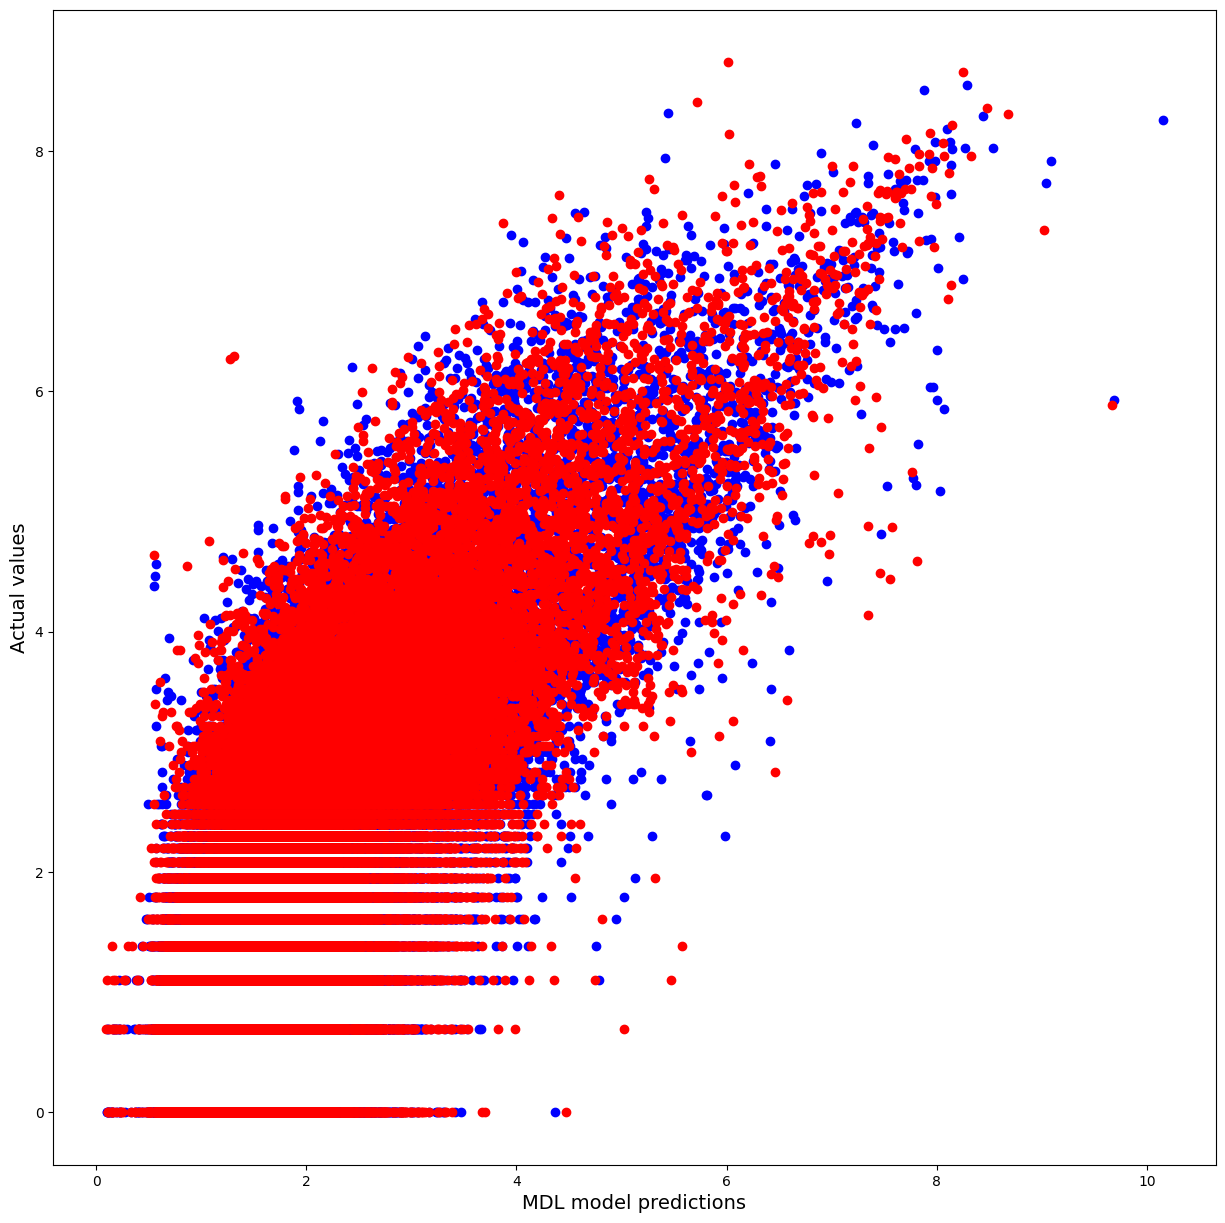

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(mdl_model.predict(X_train), y_train, color='blue')
plt.scatter(mdl_model.predict(X_test), y_test, color='red')
# plt.plot((-6, 0), (-6, 0))
plt.xlabel('MDL model predictions', fontsize=14)
plt.ylabel('Actual values', fontsize=14)
plt.show()

In [ ]:
y_pred = mdl_model.predict(X_test)

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error
print(r2_score(y_test, y_pred))

0.5347465932001627
